## Guidelines

The goal of this competition is to build a model that predicts the price of NFTs based on a select group of their attributes that are publicly accessible and also based on their social media activity.

Note that not all NFTs of a collection are necessarily present in the data.

To build your machine learning model, we have provided the following datasets:

1. collections.csv: data about the collections that are present in the training and prediction datasets.   
 **collection_id**: ID to identify the collection and the NFTs of the collection       
 **total_supply**: total number of NFTs in the collection        
 **creation_date**: creation date of the collection in the marketplace      
 **verification_status**: status of verification of the collection in the marketplace   
 **n_of_traits**: number of particular traits the NFTs in the collection can have    
 **contract_type**: type of contract in the marketplace        
 **seller_fees**: fees that the seller receives for transactions      
 **platform_fees**: fees that the marketplace receives for transactions         
 **openrarity_enabled**: whether the collection uses OpenRarity to calculate a rarity score and rank for the NFTs in the collection        
 **has_website**: whether the collection has a website or not        
 **has_own_twitter**: whether the collection has its own Twitter account or not     
 **has_discord**: whether the collection has a Discord channel or not    
 **has_medium**: whether the collection has a Medium account or not     

In [666]:
# Libraries
import numpy as np
import pandas as pd
from IPython.display import HTML

In [667]:
collections=pd.read_csv("collections.csv")

In [668]:
collections.head(5)

,collection_id,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium
0,19,1000,2021-04,verified,4,own,500.0,250,False,False,True,True,True
1,45,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False
2,44,10000,2022-04,verified,8,own,500.0,250,True,False,True,True,False
3,53,9999,2022-07,verified,9,own,900.0,250,False,False,True,True,False
4,6,9602,2021-06,verified,8,own,NaN,250,False,False,True,True,False


In [669]:
coll_True=collections[collections["openrarity_enabled"].values==True]
coll_True

,collection_id,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium
2,44,10000,2022-04,verified,8,own,500.0,250,True,False,True,True,False
11,1,15000,2022-04,verified,12,own,500.0,250,True,False,True,True,False
12,37,8888,2022-03,verified,8,own,800.0,250,True,False,True,True,True
13,34,5555,2022-02,verified,9,own,550.0,250,True,False,True,True,False
25,10,3331,2022-02,approved,12,own,500.0,250,True,False,True,True,False
33,54,9997,2021-11,verified,19,own,750.0,250,True,False,True,True,False
34,28,9996,2022-06,verified,14,own,250.0,250,True,False,True,True,False
35,58,12505,2022-04,verified,6,own,1000.0,250,True,False,True,True,False
37,38,5555,2022-07,verified,10,own,500.0,250,True,False,True,True,False
40,47,5267,2022-06,verified,0,own,750.0,250,True,False,True,True,False


In [670]:
collections.shape

(48, 13)

In [671]:
collections.describe()

,collection_id,total_supply,n_of_traits,seller_fees,platform_fees
count,48.000000,48.000000,48.000000,46.000000,48.0
mean,30.333333,10760.979167,12.083333,711.956522,250.0
std,18.062932,9524.450152,11.741603,243.626486,0.0
min,0.000000,1.000000,0.000000,200.000000,250.0
25%,14.750000,5541.000000,8.000000,500.000000,250.0
50%,30.500000,9555.000000,9.500000,750.000000,250.0
75%,45.250000,10000.000000,14.000000,900.000000,250.0
max,60.000000,58351.000000,80.000000,1000.000000,250.0


In [672]:
collections['seller_fees'].fillna((collections['seller_fees'].median()), inplace=True)

In [673]:
collections.isnull().sum()

collection_id          0
total_supply           0
creation_date          0
verification_status    0
n_of_traits            0
contract_type          0
seller_fees            0
platform_fees          0
openrarity_enabled     0
has_website            0
has_own_twitter        0
has_discord            0
has_medium             0
dtype: int64

In [674]:
collections.corr()

,collection_id,total_supply,n_of_traits,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium
collection_id,1.000000,-0.003575,-0.078383,0.234503,NaN,0.146007,NaN,NaN,0.182109,-0.179436
total_supply,-0.003575,1.000000,0.118529,-0.206401,NaN,-0.118385,NaN,NaN,-0.476969,-0.081006
n_of_traits,-0.078383,0.118529,1.000000,-0.014847,NaN,-0.113315,NaN,NaN,0.119100,0.464439
seller_fees,0.234503,-0.206401,-0.014847,1.000000,NaN,-0.233605,NaN,NaN,-0.021221,-0.061224
platform_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
openrarity_enabled,0.146007,-0.118385,-0.113315,-0.233605,NaN,1.000000,NaN,NaN,0.332302,-0.118993
has_website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_own_twitter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_discord,0.182109,-0.476969,0.119100,-0.021221,NaN,0.332302,NaN,NaN,1.000000,0.225296
has_medium,-0.179436,-0.081006,0.464439,-0.061224,NaN,-0.118993,NaN,NaN,0.225296,1.000000


2. collections_twitter_stats.csv: simple stats about the Twitter accounts of the collections or the creators of the collections.          
**collection_id:** ID to identify the collection and the NFTs of the collection         
**n_tweets_in_range:** number of tweets in the relevant timeframe
**avg_likes:** average number of likes per tweet           
**avg_replies:** average number of replies per tweet           
**avg_retweets:** average number of retweets per tweet           
**min_likes:** minimum number of likes per tweet           
**min_replies:** minimum number of replies per tweet            
**min_retweets:** minimum number of retweets per tweet               
**max_likes:** maximum number of likes per tweet           
**max_replies:** maximum number of replies per tweet          
**max_retweets:** maximum number of retweets per tweet          

In [675]:
coll_twitter_stats=pd.read_csv("collections_twitter_stats.csv")

In [676]:
coll_twitter_stats.head()

,collection_id,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,2,183.000000,8.500000,41.000000,123,3,6,243,14,76
1,1,16,36.375000,3.562500,13.937500,0,0,0,125,21,34
2,2,1,15.000000,9.000000,1.000000,15,9,1,15,9,1
3,3,526,1.178707,0.306084,2.655894,0,0,0,21,8,13
4,4,26,8.153846,0.884615,1.153846,0,0,0,30,6,12


3. nfts_train.csv: NFT data from all collections which can be, alongside the above info, used to train the price prediction model.
**global_index:** global ID of the NFT to identify it considering all collections                
**nft_id:** ID of the NFT to identify its particular collection              
**collection_id:** ID of the collection the NFT belongs to as per collections.csv file       
**rarity_score:** estimated rarity score within the collection         
**openrarity_score:** OpenRarity score if it is enabled (see 1)           
**openrarity_rank:** OpenRarity rank within the collection if it is enabled (see 1)            
**openrarity_max_rank:** OpenRarity maximum rank of the collection if it is enabled (see 1)         
**last_sale_date:** approximated date of the last sale of the NFT        
**last_sale_price:** price at which the NFT was last sold for (target variable)           

In [751]:
train_data=pd.read_csv("nfts_train.csv")

In [756]:
train_data["nft_id"].value_counts()

0        34
47       33
212      33
44       33
405      33
         ..
27334     1
29381     1
29816     1
25722     1
26227     1
Name: nft_id, Length: 29899, dtype: int64

In [644]:
train_data["collection_id"].value_counts()

46    29899
36    24154
13    23091
58    15555
1     15000
44    10000
7     10000
31    10000
18    10000
26    10000
50     9999
23     9998
54     9928
8      9667
6      9602
59     9508
4      9000
45     8888
37     8888
15     7902
43     7751
14     6969
0      6501
34     5555
38     5555
51     5080
30     5022
48     4582
25     3997
57     3900
24     2498
19     1000
60      420
49        1
Name: collection_id, dtype: int64

In [645]:
train_data.describe()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_price
count,309910.000000,309910.000000,309910.000000,309910.000000,80480.000000,80480.000000,80480.000000,3.099100e+05
mean,317003.207947,6738.162024,30.507160,1437.092531,1.000000,5630.164737,11255.829672,2.162269e+00
std,173138.765569,5977.542096,18.331668,4303.585892,0.152825,3812.126968,3452.713804,1.275132e+01
min,21928.000000,0.000000,0.000000,1.000000,0.626738,1.000000,5555.000000,6.485360e-08
25%,174892.250000,2453.000000,13.000000,106.587184,0.906820,2515.750000,9928.000000,4.077085e-03
50%,341467.500000,5138.000000,34.000000,170.797030,0.978289,5030.000000,10000.000000,8.103344e-03
75%,493626.750000,8720.750000,46.000000,289.614129,1.059866,8207.250000,15000.000000,3.252062e-01
max,590227.000000,29898.000000,60.000000,90354.072248,3.663833,15555.000000,15555.000000,1.024002e+03


In [646]:
train_data.isnull().sum()

global_index                0
nft_id                      0
collection_id               0
rarity_score                0
openrarity_score       229430
openrarity_rank        229430
openrarity_max_rank    229430
last_sale_date              0
last_sale_price             0
dtype: int64

In [647]:
train_data["openrarity_score"].value_counts().sort_values(ascending=False)

1.973398    70
0.779231    59
0.779281    47
0.770424    44
0.770374    40
            ..
1.022715     1
0.955149     1
1.175164     1
1.474469     1
0.846365     1
Name: openrarity_score, Length: 74642, dtype: int64

In [688]:

# train_data['openrarity_score'].fillna((train_data['openrarity_score']==0), inplace=True)
# train_data['openrarity_rank'].fillna((train_data['openrarity_rank']==0), inplace=True)
# train_data['openrarity_max_rank'].fillna((train_data['openrarity_max_rank']==0), inplace=True)
train_data.replace(np.nan,0,inplace=True)

In [689]:

train_data.sort_values(by="global_index")

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price
0,21928,0,49,2.000000,0.0,0.0,0.0,2022-11,1.266732
1,32621,0,45,97.077216,0.0,0.0,0.0,2021-08,1.200357
2,32622,1,45,139.453086,0.0,0.0,0.0,2022-08,3.180572
3,32623,2,45,127.753445,0.0,0.0,0.0,2021-08,3.502910
4,32624,3,45,112.315719,0.0,0.0,0.0,2022-09,4.009567
...,...,...,...,...,...,...,...,...,...
309905,590223,8995,4,128.268841,0.0,0.0,0.0,2022-08,0.001571
309906,590224,8996,4,152.040769,0.0,0.0,0.0,2022-08,0.001661
309907,590225,8997,4,178.734807,0.0,0.0,0.0,2022-08,0.008480
309908,590226,8998,4,130.974464,0.0,0.0,0.0,2022-08,0.004236


In [690]:
train_data.corr()["last_sale_price"]

global_index          -0.096667
nft_id                -0.055394
collection_id         -0.118710
rarity_score          -0.046505
openrarity_score      -0.013778
openrarity_rank       -0.026534
openrarity_max_rank   -0.025981
last_sale_price        1.000000
Name: last_sale_price, dtype: float64

In [691]:
# from sklearn.metrics import confusion_matrix
# from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

# # Plotting libraries
# import matplotlib
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set(color_codes = True)
# %matplotlib inline

In [692]:
train_with_collection=pd.merge(collections,coll_twitter_stats,on="collection_id")
train_with_collection.head()

,collection_id,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,...,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,11,43.454545,5.454545,94.272727,0,0,36,239,30,258
1,45,8888,2021-07,verified,5,own,500.0,250,False,False,...,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
2,44,10000,2022-04,verified,8,own,500.0,250,True,False,...,7,593.714286,80.285714,110.285714,94,43,14,1532,153,386
3,53,9999,2022-07,verified,9,own,900.0,250,False,False,...,8,707.875000,103.875000,314.000000,236,26,46,1381,242,873
4,6,9602,2021-06,verified,8,own,750.0,250,False,False,...,12,0.000000,0.000000,111.833333,0,0,31,0,0,463


In [693]:
train_with_collection=pd.merge(train_with_collection,train_data,on="collection_id")

In [694]:
train_with_collection.head()

,collection_id,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,...,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price
0,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322076,0,48.156807,0.0,0.0,0.0,2022-11,12.508229
1,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322077,1,82.404768,0.0,0.0,0.0,2022-11,0.000800
2,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322078,2,30.983457,0.0,0.0,0.0,2022-11,0.002823
3,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322079,3,62.799472,0.0,0.0,0.0,2021-11,85.009723
4,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322080,4,45.523411,0.0,0.0,0.0,2021-11,0.009392


In [695]:
train_with_collection["openrarity_score"].value_counts()

0.000000    229430
1.973398        70
0.779231        59
0.779281        47
0.770424        44
             ...  
1.103303         1
0.877011         1
1.030426         1
1.101704         1
0.846365         1
Name: openrarity_score, Length: 74643, dtype: int64

In [696]:
train_with_collection.groupby(train_with_collection["openrarity_enabled"]).count()

,collection_id,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,has_website,has_own_twitter,...,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price
openrarity_enabled,,,,,,,,,,,,,,,,,,,,,
False,229430,229430,229430,229430,229430,229430,229430,229430,229430,229430,...,229430,229430,229430,229430,229430,229430,229430,229430,229430,229430
True,80480,80480,80480,80480,80480,80480,80480,80480,80480,80480,...,80480,80480,80480,80480,80480,80480,80480,80480,80480,80480


In [697]:
train_with_collection.isnull().sum()

collection_id          0
total_supply           0
creation_date          0
verification_status    0
n_of_traits            0
contract_type          0
seller_fees            0
platform_fees          0
openrarity_enabled     0
has_website            0
has_own_twitter        0
has_discord            0
has_medium             0
n_tweets_in_range      0
avg_likes              0
avg_replies            0
avg_retweets           0
min_likes              0
min_replies            0
min_retweets           0
max_likes              0
max_replies            0
max_retweets           0
global_index           0
nft_id                 0
rarity_score           0
openrarity_score       0
openrarity_rank        0
openrarity_max_rank    0
last_sale_date         0
last_sale_price        0
dtype: int64

In [698]:
train_with_collection.corr()["last_sale_price"]

collection_id         -0.118710
total_supply          -0.081918
n_of_traits           -0.107547
seller_fees           -0.217513
platform_fees               NaN
openrarity_enabled    -0.018842
has_website                 NaN
has_own_twitter             NaN
has_discord            0.108122
has_medium            -0.033832
n_tweets_in_range     -0.033210
avg_likes              0.044742
avg_replies            0.001231
avg_retweets           0.131632
min_likes              0.021865
min_replies            0.052180
min_retweets           0.267012
max_likes              0.014106
max_replies           -0.012231
max_retweets           0.081139
global_index          -0.096667
nft_id                -0.055394
rarity_score          -0.046505
openrarity_score      -0.013778
openrarity_rank       -0.026534
openrarity_max_rank   -0.025981
last_sale_price        1.000000
Name: last_sale_price, dtype: float64

In [60]:
# print(train_with_collection.groupby("global_index").count())

In [69]:
# train_with_collection.dropna(axis=1,inplace=True)
# train_with_collection.shape
# train_with_collection.reset_index("global_index")

In [ ]:
test_data=pd.read_csv("nfts_predict.csv")

In [ ]:
test_data.head(5)

In [109]:
test_data['openrarity_score'].fillna((test_data['openrarity_score'].median()), inplace=True)
test_data['openrarity_rank'].fillna((test_data['openrarity_rank'].mean()), inplace=True)
test_data['openrarity_max_rank'].fillna((test_data['openrarity_max_rank'].mean()), inplace=True)

In [145]:
test=test_data.drop("last_sale_date",axis=1)

In [146]:
test_data["last_sale_price"]=model.predict(test)

In [147]:
test_data

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price
0,0,0,29,176.364208,0.982769,4372.867628,8741.760731,2022-06,4.702711
1,1,1,29,207.209228,0.982769,4372.867628,8741.760731,2022-05,2.407767
2,2,2,29,157.293414,0.982769,4372.867628,8741.760731,2022-10,0.440636
3,3,3,29,173.372185,0.982769,4372.867628,8741.760731,2022-06,2.407767
4,4,4,29,190.077584,0.982769,4372.867628,8741.760731,2022-06,2.407767
...,...,...,...,...,...,...,...,...,...
181209,618137,7140,42,134.963415,0.982769,4372.867628,8741.760731,2021-04,1.252733
181210,618138,7141,42,128.686047,0.982769,4372.867628,8741.760731,2021-04,1.252733
181211,618139,7142,42,22134.000000,0.982769,4372.867628,8741.760731,2021-04,1.252733
181212,618140,7143,42,22134.000000,0.982769,4372.867628,8741.760731,2021-04,1.252733


In [155]:
data=test_data[["global_index","last_sale_price"]]

In [156]:
data

,global_index,last_sale_price
0,0,4.702711
1,1,2.407767
2,2,0.440636
3,3,2.407767
4,4,2.407767
...,...,...
181209,618137,1.252733
181210,618138,1.252733
181211,618139,1.252733
181212,618140,1.252733


In [153]:
sub=pd.read_csv("submission_format1.csv")

In [ ]:
sub

In [160]:
data.to_csv("submission_format.csv",index=False)

In [161]:
sub1=pd.read_csv("submission_format.csv")

In [162]:
sub1

,global_index,last_sale_price
0,0,4.702711
1,1,2.407767
2,2,0.440636
3,3,2.407767
4,4,2.407767
...,...,...
181209,618137,1.252733
181210,618138,1.252733
181211,618139,1.252733
181212,618140,1.252733


In [660]:
train_with_collection.head()

,collection_id,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,...,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price
0,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322076,0,48.156807,False,False,False,2022-11,12.508229
1,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322077,1,82.404768,False,False,False,2022-11,0.000800
2,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322078,2,30.983457,False,False,False,2022-11,0.002823
3,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322079,3,62.799472,False,False,False,2021-11,85.009723
4,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322080,4,45.523411,False,False,False,2021-11,0.009392


In [ ]:
test_with_collection=pd.merge(train_with_collection,test_data,on="collection_id")

In [256]:
train_with_collection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309910 entries, 0 to 309909
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   collection_id        309910 non-null  int64  
 1   total_supply         309910 non-null  int64  
 2   creation_date        309910 non-null  object 
 3   verification_status  309910 non-null  object 
 4   n_of_traits          309910 non-null  int64  
 5   contract_type        309910 non-null  object 
 6   seller_fees          309910 non-null  float64
 7   platform_fees        309910 non-null  int64  
 8   openrarity_enabled   309910 non-null  bool   
 9   has_website          309910 non-null  bool   
 10  has_own_twitter      309910 non-null  bool   
 11  has_discord          309910 non-null  bool   
 12  has_medium           309910 non-null  bool   
 13  n_tweets_in_range    309910 non-null  int64  
 14  avg_likes            309910 non-null  float64
 15  avg_replies      

In [41]:
train_with_collection.describe()

,collection_id,total_supply,n_of_traits,seller_fees,platform_fees,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,...,max_likes,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_price
count,309910.000000,309910.000000,309910.000000,277217.000000,309910.0,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,...,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,3.099100e+05
mean,30.507160,13402.176838,10.557885,693.828661,250.0,17.166665,80.290716,20.314344,41.940726,12.595537,...,304.933981,107.703885,190.700142,317003.207947,6738.162024,1437.092531,0.983927,5630.164737,11255.829672,2.162269e+00
std,18.331668,7915.325634,4.878024,263.609541,0.0,27.037390,154.619275,62.247978,83.335786,33.550405,...,898.138000,445.353597,523.418690,173138.765569,5977.542096,4303.585892,0.078458,1942.636517,1759.481774,1.275132e+01
min,0.000000,1.000000,1.000000,250.000000,250.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,21928.000000,0.000000,1.000000,0.626738,1.000000,5555.000000,6.485360e-08
25%,13.000000,8888.000000,8.000000,500.000000,250.0,3.000000,2.000000,0.200000,1.153846,0.000000,...,5.000000,1.000000,5.000000,174892.250000,2453.000000,106.587184,0.978289,5630.164737,11255.829672,4.077085e-03
50%,34.000000,9999.000000,10.000000,750.000000,250.0,11.000000,8.153846,3.450000,8.166667,0.000000,...,30.000000,7.000000,34.000000,341467.500000,5138.000000,170.797030,0.978289,5630.164737,11255.829672,8.103344e-03
75%,46.000000,15000.000000,12.000000,1000.000000,250.0,19.000000,60.888889,8.500000,55.181818,2.000000,...,202.000000,47.000000,131.000000,493626.750000,8720.750000,289.614129,0.978289,5630.164737,11255.829672,3.252062e-01
max,60.000000,29899.000000,31.000000,1000.000000,250.0,151.000000,707.875000,353.400000,442.000000,236.000000,...,5079.000000,2601.000000,2990.000000,590227.000000,29898.000000,90354.072248,3.663833,15555.000000,15555.000000,1.024002e+03


In [699]:
x=Intcolumn.drop(["last_sale_price","platform_fees","has_website","has_own_twitter","openrarity_enabled","has_discord","has_medium","min_replies"],axis=1)
y=Intcolumn["last_sale_price"]

In [700]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [701]:
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [702]:
print("Accuracy of Linear Regression` is {}".format(reg.score(X_train,Y_train)))

Accuracy of Linear Regression` is 0.2234846095987698


In [525]:
print("Accuracy of Linear Regression` is {}".format(reg.score(X_test,Y_test)))

Accuracy of Linear Regression` is 0.23883331530559215


In [526]:
model=DecisionTreeRegressor()
model.fit(X_train,Y_train)
print("Accuracy of Decision Tree is {}".format(model.score(X_train,Y_train)))

Accuracy of Decision Tree is 1.0


In [527]:
print("Accuracy of Decision Tree is {}".format(model.score(X_test,Y_test)))

Accuracy of Decision Tree is -0.6192780290555182


In [291]:
Intcolumn=train_with_collection.select_dtypes(exclude = ['object',"bool"])

In [293]:
Intcolumns=[i for i in Intcolumn.columns]
Intcolumns

['collection_id',
 'total_supply',
 'n_of_traits',
 'seller_fees',
 'platform_fees',
 'openrarity_enabled',
 'has_website',
 'has_own_twitter',
 'has_discord',
 'has_medium',
 'n_tweets_in_range',
 'avg_likes',
 'avg_replies',
 'avg_retweets',
 'min_likes',
 'min_replies',
 'min_retweets',
 'max_likes',
 'max_replies',
 'max_retweets',
 'global_index',
 'nft_id',
 'rarity_score',
 'openrarity_score',
 'openrarity_rank',
 'openrarity_max_rank',
 'last_sale_price']

In [264]:
col=['collection_id', 'total_supply', 'n_of_traits', 'seller_fees',
       'platform_fees', 'n_tweets_in_range', 'avg_likes', 'avg_replies',
       'avg_retweets', 'min_likes', 'min_replies', 'min_retweets', 'max_likes',
       'max_replies', 'max_retweets', 'global_index', 'nft_id', 'rarity_score',
       'openrarity_score', 'openrarity_rank', 'openrarity_max_rank',
       'last_sale_price']

In [295]:
# for i in Intcolumns:
    
#     plt.subplot(2,2,2)
#     sns.distplot(train_with_collection[i])
    

## Using percentile outlier detection

In [48]:
upperlimit=train_data["rarity_score"].quantile(0.99)

In [49]:
lowerlimit=train_data["rarity_score"].quantile(0.01)

In [51]:
upperlimit

19925.969636762355

In [52]:
lowerlimit

1.8284615384615384

In [57]:
Outlier=train_data[(train_data["rarity_score"]<1.82) | (train_data["rarity_score"]>=19925)]

In [60]:
tr_data=train_data[(train_data["rarity_score"]>=1.82) & (train_data["rarity_score"]<=19925)]

In [61]:
tr_data.describe()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_price
count,306804.000000,306804.000000,306804.000000,306804.000000,306804.000000,306804.000000,306804.000000,3.068040e+05
mean,316302.020329,6644.786000,30.451317,1216.257232,0.983925,5630.549717,11255.883098,2.181195e+00
std,173857.901936,5900.815855,18.414922,3703.235798,0.078481,1951.890519,1768.312132,1.278856e+01
min,21928.000000,0.000000,0.000000,1.828462,0.626738,1.000000,5555.000000,6.485360e-08
25%,174120.750000,2433.000000,13.000000,106.011019,0.978289,5630.164737,11255.829672,4.102859e-03
50%,339946.500000,5088.000000,34.000000,169.791699,0.978289,5630.164737,11255.829672,8.152993e-03
75%,494403.250000,8625.000000,46.000000,282.578602,0.978289,5630.164737,11255.829672,3.360507e-01
max,590227.000000,29898.000000,60.000000,19924.689155,3.663833,15555.000000,15555.000000,1.024002e+03


In [80]:
train_data["rarity_score"]=np.where(train_data["rarity_score"]>=upperlimit,
         upperlimit,
         np.where(train_data["rarity_score"]<=lowerlimit,
         lowerlimit,
         train_data["rarity_score"]))

In [81]:
train_data.describe()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_price
count,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,3.099100e+05
mean,317003.207947,6738.162024,30.507160,1403.449468,0.983927,5630.164737,11255.829672,2.162269e+00
std,173138.765569,5977.542096,18.331668,4128.460193,0.078458,1942.636517,1759.481774,1.275132e+01
min,21928.000000,0.000000,0.000000,1.828462,0.626738,1.000000,5555.000000,6.485360e-08
25%,174892.250000,2453.000000,13.000000,106.587184,0.978289,5630.164737,11255.829672,4.077085e-03
50%,341467.500000,5138.000000,34.000000,170.797030,0.978289,5630.164737,11255.829672,8.103344e-03
75%,493626.750000,8720.750000,46.000000,289.614129,0.978289,5630.164737,11255.829672,3.252062e-01
max,590227.000000,29898.000000,60.000000,19925.969637,3.663833,15555.000000,15555.000000,1.024002e+03


In [82]:
train_data.corr()["last_sale_price"]

global_index          -0.096667
nft_id                -0.055394
collection_id         -0.118710
rarity_score          -0.047835
openrarity_score       0.024804
openrarity_rank       -0.018963
openrarity_max_rank   -0.024517
last_sale_price        1.000000
Name: last_sale_price, dtype: float64

In [76]:
train_data["openrarity_score"].median()

0.9782885441260575

## Using Zscore

In [90]:
hCore=(train_data["openrarity_score"].mean())+(3*train_data["openrarity_score"].std())

In [91]:
lCore=(train_data["openrarity_score"].mean())-(3*train_data["openrarity_score"].std())

In [92]:
train_data[(train_data["openrarity_score"]>1.21)|(train_data["openrarity_score"]<0.74)]

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price
9022,41642,133,54,2501.108750,1.220960,61.0,9928.0,2021-11,0.352916
17078,49768,8189,54,4676.375316,1.212887,62.0,9928.0,2022-02,0.008918
30340,63030,0,58,68.641489,1.345539,819.0,15555.0,2022-08,0.003816
30361,63051,21,58,85.747762,1.262861,1161.0,15555.0,2022-04,1.099719
30363,63053,23,58,80.445471,1.401301,226.0,15555.0,2022-04,0.694138
...,...,...,...,...,...,...,...,...,...
290859,552614,5504,34,294.850455,1.387957,105.0,5555.0,2022-05,3.502394
290872,552627,5517,34,220.823603,1.243080,255.0,5555.0,2022-02,7.509396
290873,552628,5518,34,209.349108,1.265054,212.0,5555.0,2022-02,7.393807
290884,552639,5529,34,188.428538,1.232073,288.0,5555.0,2022-02,6.006676


In [96]:
train_data["openrarity_score"]=np.where(train_data["openrarity_score"]>=hCore,
         hCore,
         np.where(train_data["openrarity_score"]<=lCore,
         lCore,
         train_data["openrarity_score"]))

In [98]:
train_data.corr()["last_sale_price"]

global_index          -0.096667
nft_id                -0.055394
collection_id         -0.118710
rarity_score          -0.047835
openrarity_score       0.004893
openrarity_rank       -0.018963
openrarity_max_rank   -0.024517
last_sale_price        1.000000
Name: last_sale_price, dtype: float64

In [104]:
train_data.describe()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_price
count,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,3.099100e+05
mean,317003.207947,6738.162024,30.507160,1403.449468,0.981171,5630.164737,11255.829672,2.162269e+00
std,173138.765569,5977.542096,18.331668,4128.460193,0.060451,1942.636517,1759.481774,1.275132e+01
min,21928.000000,0.000000,0.000000,1.828462,0.748552,1.000000,5555.000000,6.485360e-08
25%,174892.250000,2453.000000,13.000000,106.587184,0.978289,5630.164737,11255.829672,4.077085e-03
50%,341467.500000,5138.000000,34.000000,170.797030,0.978289,5630.164737,11255.829672,8.103344e-03
75%,493626.750000,8720.750000,46.000000,289.614129,0.978289,5630.164737,11255.829672,3.252062e-01
max,590227.000000,29898.000000,60.000000,19925.969637,1.219302,15555.000000,15555.000000,1.024002e+03


/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nft_id', ylabel='Density'>

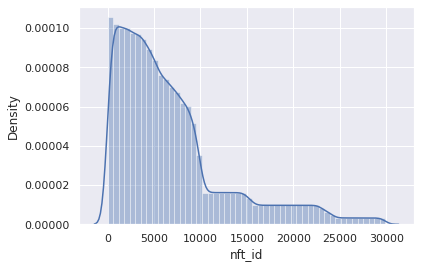

In [106]:
sns.distplot(train_data["nft_id"])

In [107]:
ul=train_data["nft_id"].quantile(0.99)

In [114]:
ll=train_data["nft_id"].quantile(0.01)
ll

93.0

In [113]:
Outlier1=train_data[(train_data["nft_id"]<ll) | (train_data["nft_id"]>=ul)]
Outlier1["nft_id"].value_counts()

0        34
37       33
21       33
35       33
25       33
         ..
27252     1
29303     1
27256     1
29307     1
28670     1
Name: nft_id, Length: 3193, dtype: int64

In [268]:
train_with_collection.describe()

,collection_id,total_supply,n_of_traits,seller_fees,platform_fees,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,...,max_likes,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_price
count,309910.000000,309910.000000,309910.000000,309910.000000,309910.0,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,...,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,3.099100e+05
mean,30.507160,13402.176838,10.557885,699.754284,250.0,17.166665,80.290716,20.314344,41.940726,12.595537,...,304.933981,107.703885,190.700142,317003.207947,6738.162024,1437.092531,0.983927,5630.164737,11255.829672,2.162269e+00
std,18.331668,7915.325634,4.878024,249.914130,0.0,27.037390,154.619275,62.247978,83.335786,33.550405,...,898.138000,445.353597,523.418690,173138.765569,5977.542096,4303.585892,0.078458,1942.636517,1759.481774,1.275132e+01
min,0.000000,1.000000,1.000000,250.000000,250.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,21928.000000,0.000000,1.000000,0.626738,1.000000,5555.000000,6.485360e-08
25%,13.000000,8888.000000,8.000000,500.000000,250.0,3.000000,2.000000,0.200000,1.153846,0.000000,...,5.000000,1.000000,5.000000,174892.250000,2453.000000,106.587184,0.978289,5630.164737,11255.829672,4.077085e-03
50%,34.000000,9999.000000,10.000000,750.000000,250.0,11.000000,8.153846,3.450000,8.166667,0.000000,...,30.000000,7.000000,34.000000,341467.500000,5138.000000,170.797030,0.978289,5630.164737,11255.829672,8.103344e-03
75%,46.000000,15000.000000,12.000000,900.000000,250.0,19.000000,60.888889,8.500000,55.181818,2.000000,...,202.000000,47.000000,131.000000,493626.750000,8720.750000,289.614129,0.978289,5630.164737,11255.829672,3.252062e-01
max,60.000000,29899.000000,31.000000,1000.000000,250.0,151.000000,707.875000,353.400000,442.000000,236.000000,...,5079.000000,2601.000000,2990.000000,590227.000000,29898.000000,90354.072248,3.663833,15555.000000,15555.000000,1.024002e+03


In [703]:
train_with_collection.corr()["last_sale_price"]

collection_id         -0.118710
total_supply          -0.081918
n_of_traits           -0.107547
seller_fees           -0.217513
platform_fees               NaN
openrarity_enabled    -0.018842
has_website                 NaN
has_own_twitter             NaN
has_discord            0.108122
has_medium            -0.033832
n_tweets_in_range     -0.033210
avg_likes              0.044742
avg_replies            0.001231
avg_retweets           0.131632
min_likes              0.021865
min_replies            0.052180
min_retweets           0.267012
max_likes              0.014106
max_replies           -0.012231
max_retweets           0.081139
global_index          -0.096667
nft_id                -0.055394
rarity_score          -0.046505
openrarity_score      -0.013778
openrarity_rank       -0.026534
openrarity_max_rank   -0.025981
last_sale_price        1.000000
Name: last_sale_price, dtype: float64

In [ ]:
for i in Intcolumns:
#     print(i)
    
    ul=train_with_collection[i].quantile(0.99)
    ll=train_with_collection[i].quantile(0.01)
    train_with_collection[i]=np.where(train_with_collection[i]>=ul,ul,np.where(train_with_collection[i]<=ll,ll,train_with_collection[i]))
    

In [206]:
i="openrarity_rank"
ll25=train_with_collection[i].quantile(0.25)
ul75=train_with_collection[i].quantile(0.75)
iqr=ul75-ll25
ul=ul75+(1.5*iqr)
ll=ll25-(1.5*iqr)
train_with_collection[i]=np.where(train_with_collection[i]>=ul,ul,np.where(train_with_collection[i]<=ll,ll,train_with_collection[i]))

In [207]:
train_with_collection.describe()["openrarity_rank"]

count    3.099100e+05
mean     5.630165e+03
std      1.509855e-08
min      5.630165e+03
25%      5.630165e+03
50%      5.630165e+03
75%      5.630165e+03
max      5.630165e+03
Name: openrarity_rank, dtype: float64

In [194]:
ul

320.0

In [270]:
boolcolumn=train_with_collection.select_dtypes(exclude = ['object',"int64","float64"])

In [282]:
bool1=[i for i in boolcolumn.columns]

In [283]:
bool1

['openrarity_enabled',
 'has_website',
 'has_own_twitter',
 'has_discord',
 'has_medium']

In [286]:
for i in bool1:
    train_with_collection[i]=np.where(train_with_collection[i].values==True,1,np.where(train_with_collection[i].values==False,0,train_with_collection[i]))
    

In [287]:
train_with_collection

,collection_id,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,...,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price
0,19,1000,2021-04,verified,4,own,500.0,250,0,0,...,30,258,322076,0,48.156807,0.978289,5630.164737,11255.829672,2022-11,12.508229
1,19,1000,2021-04,verified,4,own,500.0,250,0,0,...,30,258,322077,1,82.404768,0.978289,5630.164737,11255.829672,2022-11,0.000800
2,19,1000,2021-04,verified,4,own,500.0,250,0,0,...,30,258,322078,2,30.983457,0.978289,5630.164737,11255.829672,2022-11,0.002823
3,19,1000,2021-04,verified,4,own,500.0,250,0,0,...,30,258,322079,3,62.799472,0.978289,5630.164737,11255.829672,2021-11,85.009723
4,19,1000,2021-04,verified,4,own,500.0,250,0,0,...,30,258,322080,4,45.523411,0.978289,5630.164737,11255.829672,2021-11,0.009392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309905,0,6501,2022-04,verified,31,own,500.0,250,0,0,...,14,76,63025,6496,701.371138,0.978289,5630.164737,11255.829672,2022-08,0.000362
309906,0,6501,2022-04,verified,31,own,500.0,250,0,0,...,14,76,63026,6497,346.851413,0.978289,5630.164737,11255.829672,2022-08,0.002101
309907,0,6501,2022-04,verified,31,own,500.0,250,0,0,...,14,76,63027,6498,302.000756,0.978289,5630.164737,11255.829672,2022-08,0.005883
309908,0,6501,2022-04,verified,31,own,500.0,250,0,0,...,14,76,63028,6499,276.210173,0.978289,5630.164737,11255.829672,2022-08,0.009228


In [288]:
train_with_collection.describe()

,collection_id,total_supply,n_of_traits,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium,...,max_likes,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_price
count,309910.000000,309910.000000,309910.000000,309910.000000,309910.0,309910.000000,309910.0,309910.0,309910.000000,309910.000000,...,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,3.099100e+05
mean,30.507160,13402.176838,10.557885,699.754284,250.0,0.259688,0.0,1.0,0.709942,0.100381,...,304.933981,107.703885,190.700142,317003.207947,6738.162024,1437.092531,0.983927,5630.164737,11255.829672,2.162269e+00
std,18.331668,7915.325634,4.878024,249.914130,0.0,0.438464,0.0,0.0,0.453790,0.300507,...,898.138000,445.353597,523.418690,173138.765569,5977.542096,4303.585892,0.078458,1942.636517,1759.481774,1.275132e+01
min,0.000000,1.000000,1.000000,250.000000,250.0,0.000000,0.0,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,21928.000000,0.000000,1.000000,0.626738,1.000000,5555.000000,6.485360e-08
25%,13.000000,8888.000000,8.000000,500.000000,250.0,0.000000,0.0,1.0,0.000000,0.000000,...,5.000000,1.000000,5.000000,174892.250000,2453.000000,106.587184,0.978289,5630.164737,11255.829672,4.077085e-03
50%,34.000000,9999.000000,10.000000,750.000000,250.0,0.000000,0.0,1.0,1.000000,0.000000,...,30.000000,7.000000,34.000000,341467.500000,5138.000000,170.797030,0.978289,5630.164737,11255.829672,8.103344e-03
75%,46.000000,15000.000000,12.000000,900.000000,250.0,1.000000,0.0,1.0,1.000000,0.000000,...,202.000000,47.000000,131.000000,493626.750000,8720.750000,289.614129,0.978289,5630.164737,11255.829672,3.252062e-01
max,60.000000,29899.000000,31.000000,1000.000000,250.0,1.000000,0.0,1.0,1.000000,1.000000,...,5079.000000,2601.000000,2990.000000,590227.000000,29898.000000,90354.072248,3.663833,15555.000000,15555.000000,1.024002e+03


In [290]:
train_with_collection.corr()["last_sale_price"]

collection_id         -0.118710
total_supply          -0.081918
n_of_traits           -0.107547
seller_fees           -0.217513
platform_fees               NaN
openrarity_enabled    -0.018842
has_website                 NaN
has_own_twitter             NaN
has_discord            0.108122
has_medium            -0.033832
n_tweets_in_range     -0.033210
avg_likes              0.044742
avg_replies            0.001231
avg_retweets           0.131632
min_likes              0.021865
min_replies            0.052180
min_retweets           0.267012
max_likes              0.014106
max_replies           -0.012231
max_retweets           0.081139
global_index          -0.096667
nft_id                -0.055394
rarity_score          -0.046505
openrarity_score       0.024804
openrarity_rank       -0.018963
openrarity_max_rank   -0.024517
last_sale_price        1.000000
Name: last_sale_price, dtype: float64

In [321]:
Intcolumn

,collection_id,total_supply,n_of_traits,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium,...,max_likes,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_price
0,19,1000,4,500.0,250,0,0,1,1,1,...,239,30,258,322076,0,48.156807,0.978289,5630.164737,11255.829672,12.508229
1,19,1000,4,500.0,250,0,0,1,1,1,...,239,30,258,322077,1,82.404768,0.978289,5630.164737,11255.829672,0.000800
2,19,1000,4,500.0,250,0,0,1,1,1,...,239,30,258,322078,2,30.983457,0.978289,5630.164737,11255.829672,0.002823
3,19,1000,4,500.0,250,0,0,1,1,1,...,239,30,258,322079,3,62.799472,0.978289,5630.164737,11255.829672,85.009723
4,19,1000,4,500.0,250,0,0,1,1,1,...,239,30,258,322080,4,45.523411,0.978289,5630.164737,11255.829672,0.009392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309905,0,6501,31,500.0,250,0,0,1,1,1,...,243,14,76,63025,6496,701.371138,0.978289,5630.164737,11255.829672,0.000362
309906,0,6501,31,500.0,250,0,0,1,1,1,...,243,14,76,63026,6497,346.851413,0.978289,5630.164737,11255.829672,0.002101
309907,0,6501,31,500.0,250,0,0,1,1,1,...,243,14,76,63027,6498,302.000756,0.978289,5630.164737,11255.829672,0.005883
309908,0,6501,31,500.0,250,0,0,1,1,1,...,243,14,76,63028,6499,276.210173,0.978289,5630.164737,11255.829672,0.009228


In [320]:
train_with_collection["verification_status"].value_counts()

verified    179370
approved    130540
Name: verification_status, dtype: int64

In [493]:
tr["n_of_traits"]=train_with_collection["n_of_traits"]

<ipython-input-493-8ee818822b75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intcolumn["n_of_traits"]=train_with_collection["n_of_traits"]


/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_of_traits', ylabel='Density'>

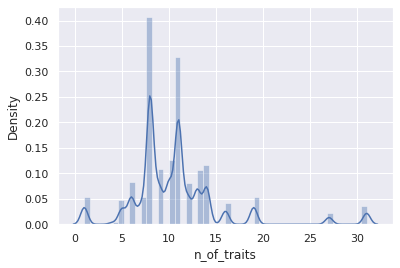

In [494]:
sns.distplot(Intcolumn["n_of_traits"])

In [495]:
Intcolumn["n_of_traits"].describe()

count    309910.000000
mean         10.557885
std           4.878024
min           1.000000
25%           8.000000
50%          10.000000
75%          12.000000
max          31.000000
Name: n_of_traits, dtype: float64

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n_of_traits'>

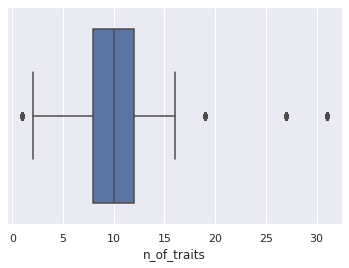

In [496]:
sns.boxplot(Intcolumn["n_of_traits"])

In [497]:
hCore=(Intcolumn["n_of_traits"].mean())+(3*Intcolumn["n_of_traits"].std())
lCore=(Intcolumn["n_of_traits"].mean())-(3*Intcolumn["n_of_traits"].std())

In [498]:
Intcolumn[(Intcolumn["n_of_traits"]>hCore)|(Intcolumn["n_of_traits"]<lCore)]

,collection_id,total_supply,n_of_traits,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium,...,max_likes,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_price
140259,25,4000,27,750.0,250,0,0,1,1,0,...,193.0,27.0,320.0,396298,0.0,346.601987,0.978289,5630.164737,11255.829672,0.013957
140260,25,4000,27,750.0,250,0,0,1,1,0,...,193.0,27.0,320.0,396299,1.0,324.322058,0.978289,5630.164737,11255.829672,0.038350
140261,25,4000,27,750.0,250,0,0,1,1,0,...,193.0,27.0,320.0,396300,2.0,332.897583,0.978289,5630.164737,11255.829672,0.007151
140262,25,4000,27,750.0,250,0,0,1,1,0,...,193.0,27.0,320.0,396301,3.0,418.509135,0.978289,5630.164737,11255.829672,0.033071
140263,25,4000,27,750.0,250,0,0,1,1,0,...,193.0,27.0,320.0,396302,4.0,324.561496,0.978289,5630.164737,11255.829672,0.003144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309905,0,6501,31,500.0,250,0,0,1,1,1,...,243.0,14.0,76.0,63025,6496.0,564.154545,0.978289,5630.164737,11255.829672,0.000362
309906,0,6501,31,500.0,250,0,0,1,1,1,...,243.0,14.0,76.0,63026,6497.0,346.851413,0.978289,5630.164737,11255.829672,0.002101
309907,0,6501,31,500.0,250,0,0,1,1,1,...,243.0,14.0,76.0,63027,6498.0,302.000756,0.978289,5630.164737,11255.829672,0.005883
309908,0,6501,31,500.0,250,0,0,1,1,1,...,243.0,14.0,76.0,63028,6499.0,276.210173,0.978289,5630.164737,11255.829672,0.009228


In [499]:
Intcolumn["n_of_traits"]=np.where(Intcolumn["n_of_traits"]>=hCore,
         hCore,
         np.where(Intcolumn["n_of_traits"]<=lCore,
         lCore,
         Intcolumn["n_of_traits"]))

<ipython-input-499-cbf3b6f6ca26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intcolumn["n_of_traits"]=np.where(Intcolumn["n_of_traits"]>=hCore,


In [337]:
Intcolumn.describe()

,collection_id,total_supply,n_of_traits,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium,...,max_likes,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_price
count,309910.000000,309910.000000,309910.000000,309910.000000,309910.0,309910.000000,309910.0,309910.0,309910.000000,309910.000000,...,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,309910.000000,3.099100e+05
mean,30.507160,13402.176838,10.128816,699.754284,250.0,0.259688,0.0,1.0,0.709942,0.100381,...,304.933981,107.703885,190.700142,317003.207947,6738.162024,1437.092531,0.983927,5630.164737,11255.829672,2.162269e+00
std,18.331668,7915.325634,2.840445,249.914130,0.0,0.438464,0.0,0.0,0.453790,0.300507,...,898.138000,445.353597,523.418690,173138.765569,5977.542096,4303.585892,0.078458,1942.636517,1759.481774,1.275132e+01
min,0.000000,1.000000,5.679861,250.000000,250.0,0.000000,0.0,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,21928.000000,0.000000,1.000000,0.626738,1.000000,5555.000000,6.485360e-08
25%,13.000000,8888.000000,8.000000,500.000000,250.0,0.000000,0.0,1.0,0.000000,0.000000,...,5.000000,1.000000,5.000000,174892.250000,2453.000000,106.587184,0.978289,5630.164737,11255.829672,4.077085e-03
50%,34.000000,9999.000000,10.000000,750.000000,250.0,0.000000,0.0,1.0,1.000000,0.000000,...,30.000000,7.000000,34.000000,341467.500000,5138.000000,170.797030,0.978289,5630.164737,11255.829672,8.103344e-03
75%,46.000000,15000.000000,12.000000,900.000000,250.0,1.000000,0.0,1.0,1.000000,0.000000,...,202.000000,47.000000,131.000000,493626.750000,8720.750000,289.614129,0.978289,5630.164737,11255.829672,3.252062e-01
max,60.000000,29899.000000,15.435908,1000.000000,250.0,1.000000,0.0,1.0,1.000000,1.000000,...,5079.000000,2601.000000,2990.000000,590227.000000,29898.000000,90354.072248,3.663833,15555.000000,15555.000000,1.024002e+03


In [344]:
Intcolumn.corr()["last_sale_price"]

collection_id         -0.118710
total_supply          -0.081918
n_of_traits           -0.152726
seller_fees           -0.217513
platform_fees               NaN
openrarity_enabled    -0.018842
has_website                 NaN
has_own_twitter             NaN
has_discord            0.108122
has_medium            -0.033832
n_tweets_in_range     -0.033210
avg_likes              0.044742
avg_replies            0.001231
avg_retweets           0.131632
min_likes              0.021865
min_replies            0.052180
min_retweets           0.267012
max_likes              0.014106
max_replies           -0.012231
max_retweets           0.081139
global_index          -0.096667
nft_id                -0.055394
rarity_score          -0.046505
openrarity_score       0.024804
openrarity_rank       -0.018963
openrarity_max_rank   -0.024517
last_sale_price        1.000000
Name: last_sale_price, dtype: float64

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='seller_fees', ylabel='Density'>

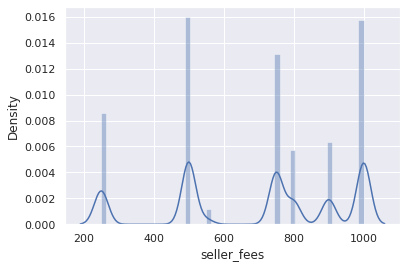

In [346]:
sns.distplot(Intcolumn["seller_fees"])

In [347]:
Intcolumn["seller_fees"].describe()

count    309910.000000
mean        699.754284
std         249.914130
min         250.000000
25%         500.000000
50%         750.000000
75%         900.000000
max        1000.000000
Name: seller_fees, dtype: float64

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seller_fees'>

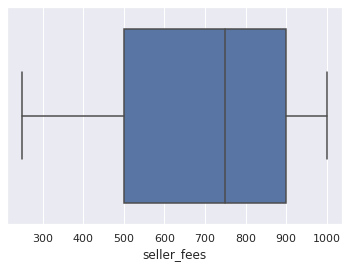

In [348]:
sns.boxplot(Intcolumn["seller_fees"])

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='openrarity_enabled', ylabel='Density'>

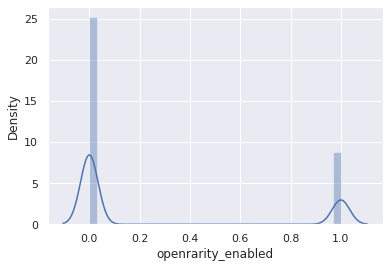

In [356]:
sns.distplot(Intcolumn["openrarity_enabled"])

In [357]:
Intcolumn["openrarity_enabled"].describe()

count    309910.000000
mean          0.259688
std           0.438464
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: openrarity_enabled, dtype: float64

In [363]:
Intcolumn["has_discord"].describe()

count    309910.000000
mean          0.709942
std           0.453790
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: has_discord, dtype: float64

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='has_discord', ylabel='Density'>

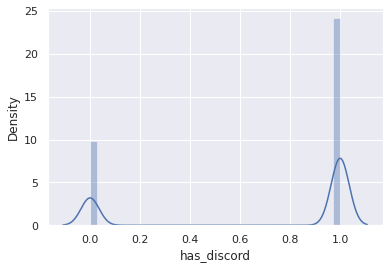

In [364]:
sns.distplot(Intcolumn["has_discord"])

In [375]:
Intcolumn["n_tweets_in_range"].describe()

count    309910.000000
mean         17.166665
std          27.037390
min           1.000000
25%           3.000000
50%          11.000000
75%          19.000000
max         151.000000
Name: n_tweets_in_range, dtype: float64

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_tweets_in_range', ylabel='Density'>

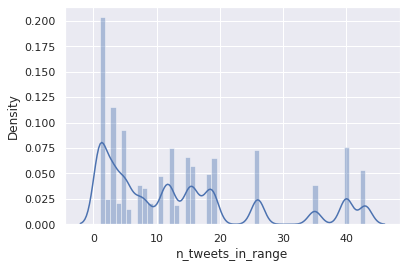

In [384]:
sns.distplot(Intcolumn["n_tweets_in_range"])

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n_tweets_in_range'>

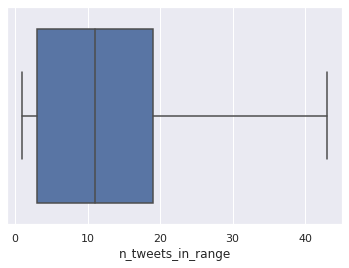

In [383]:
sns.boxplot(Intcolumn["n_tweets_in_range"])

In [381]:
i="n_tweets_in_range"
ll25=Intcolumn[i].quantile(0.25)
ul75=Intcolumn[i].quantile(0.75)
iqr=ul75-ll25
ul=ul75+(1.5*iqr)
ll=ll25-(1.5*iqr)
Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))

<ipython-input-381-09016387a45d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))


In [382]:
ul

43.0

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_likes', ylabel='Density'>

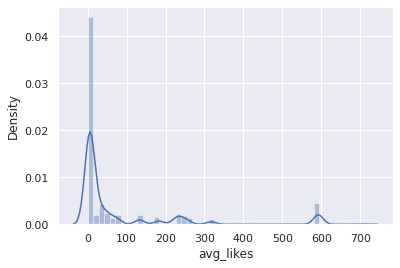

In [390]:
sns.distplot(Intcolumn["avg_likes"])

In [391]:
Intcolumn["avg_likes"].describe()

count    309910.000000
mean         80.290716
std         154.619275
min           0.000000
25%           2.000000
50%           8.153846
75%          60.888889
max         707.875000
Name: avg_likes, dtype: float64

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_likes'>

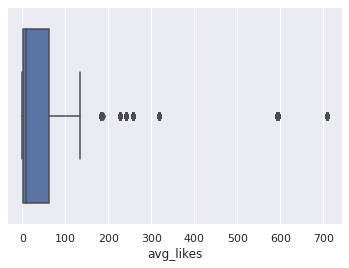

In [392]:
sns.boxplot(Intcolumn["avg_likes"])

In [393]:
i="avg_likes"
ll25=Intcolumn[i].quantile(0.25)
ul75=Intcolumn[i].quantile(0.75)
iqr=ul75-ll25
ul=ul75+(1.5*iqr)
ll=ll25-(1.5*iqr)
Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))

<ipython-input-393-1fcfa8540381>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))


/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_likes'>

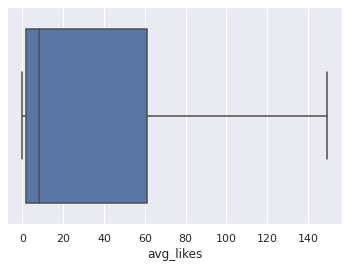

In [394]:
sns.boxplot(Intcolumn["avg_likes"])

In [400]:
Intcolumn["avg_replies"].describe()

count    309910.000000
mean         20.314344
std          62.247978
min           0.000000
25%           0.200000
50%           3.450000
75%           8.500000
max         353.400000
Name: avg_replies, dtype: float64

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_replies'>

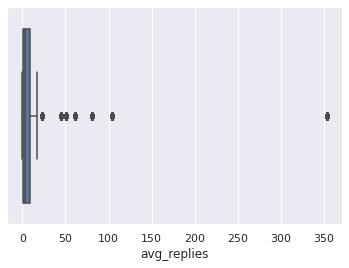

In [401]:
sns.boxplot(Intcolumn["avg_replies"])

In [402]:
i="avg_replies"
ll25=Intcolumn[i].quantile(0.25)
ul75=Intcolumn[i].quantile(0.75)
iqr=ul75-ll25
ul=ul75+(1.5*iqr)
ll=ll25-(1.5*iqr)
Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))

<ipython-input-402-002c433a576b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))


In [408]:
Intcolumn["avg_retweets"].describe()

count    309910.000000
mean         41.940726
std          83.335786
min           0.000000
25%           1.153846
50%           8.166667
75%          55.181818
max         442.000000
Name: avg_retweets, dtype: float64

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_retweets'>

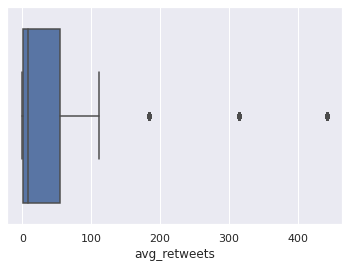

In [409]:
sns.boxplot(Intcolumn["avg_retweets"])

In [410]:
i="avg_retweets"
ll25=Intcolumn[i].quantile(0.25)
ul75=Intcolumn[i].quantile(0.75)
iqr=ul75-ll25
ul=ul75+(1.5*iqr)
ll=ll25-(1.5*iqr)
Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))

<ipython-input-410-8bfdaabb715d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))


In [416]:
ul

136.2237762237762

In [417]:
Intcolumn["min_likes"].describe()

count    309910.000000
mean         12.595537
std          33.550405
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         236.000000
Name: min_likes, dtype: float64

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_likes'>

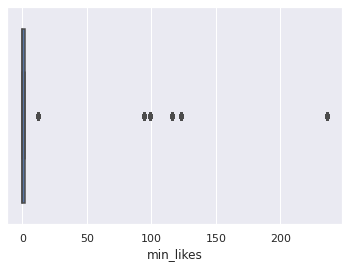

In [418]:
sns.boxplot(Intcolumn["min_likes"])

In [419]:
i="min_likes"
ll25=Intcolumn[i].quantile(0.25)
ul75=Intcolumn[i].quantile(0.75)
iqr=ul75-ll25
ul=ul75+(1.5*iqr)
ll=ll25-(1.5*iqr)
Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))

<ipython-input-419-504118f59654>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))


In [425]:
Intcolumn["min_replies"].describe()

count    309910.000000
mean          3.651638
std          11.718088
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          52.000000
Name: min_replies, dtype: float64

In [426]:
i="min_replies"
ll25=Intcolumn[i].quantile(0.25)
ul75=Intcolumn[i].quantile(0.75)
iqr=ul75-ll25
ul=ul75+(1.5*iqr)
ll=ll25-(1.5*iqr)
Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))

<ipython-input-426-49b8b8b4f3c0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))


In [432]:
Intcolumn["min_retweets"].describe()

count    309910.000000
mean          6.576667
std          11.328149
min           0.000000
25%           0.000000
50%           1.000000
75%           6.000000
max          46.000000
Name: min_retweets, dtype: float64

In [433]:
i="min_retweets"
ll25=Intcolumn[i].quantile(0.25)
ul75=Intcolumn[i].quantile(0.75)
iqr=ul75-ll25
ul=ul75+(1.5*iqr)
ll=ll25-(1.5*iqr)
Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))

<ipython-input-433-6421c3f0063d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))


/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_retweets'>

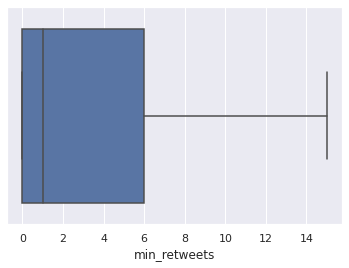

In [439]:
sns.boxplot(Intcolumn["min_retweets"])

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_likes'>

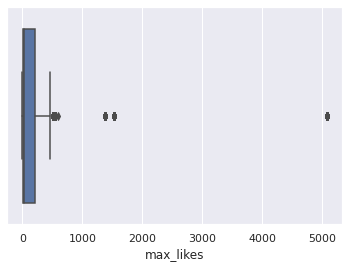

In [441]:
sns.boxplot(Intcolumn["max_likes"])

In [442]:
Intcolumn["max_likes"].describe()

count    309910.000000
mean        304.933981
std         898.138000
min           0.000000
25%           5.000000
50%          30.000000
75%         202.000000
max        5079.000000
Name: max_likes, dtype: float64

In [443]:
i="max_likes"
ll25=Intcolumn[i].quantile(0.25)
ul75=Intcolumn[i].quantile(0.75)
iqr=ul75-ll25
ul=ul75+(1.5*iqr)
ll=ll25-(1.5*iqr)
Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))

<ipython-input-443-29677e1099eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))


In [449]:
Intcolumn["max_replies"].describe()

count    309910.000000
mean        107.703885
std         445.353597
min           0.000000
25%           1.000000
50%           7.000000
75%          47.000000
max        2601.000000
Name: max_replies, dtype: float64

In [450]:
i="max_replies"
ll25=Intcolumn[i].quantile(0.25)
ul75=Intcolumn[i].quantile(0.75)
iqr=ul75-ll25
ul=ul75+(1.5*iqr)
ll=ll25-(1.5*iqr)
Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))

<ipython-input-450-085bed6261e4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))


In [456]:
Intcolumn["max_retweets"].describe()

count    309910.000000
mean        190.700142
std         523.418690
min           0.000000
25%           5.000000
50%          34.000000
75%         131.000000
max        2990.000000
Name: max_retweets, dtype: float64

In [457]:
i="max_retweets"
ll25=Intcolumn[i].quantile(0.25)
ul75=Intcolumn[i].quantile(0.75)
iqr=ul75-ll25
ul=ul75+(1.5*iqr)
ll=ll25-(1.5*iqr)
Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))

<ipython-input-457-d0dafd0d8d46>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))


/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nft_id'>

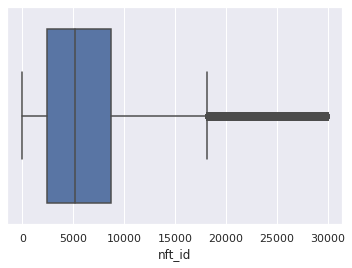

In [464]:
sns.boxplot(Intcolumn["nft_id"])

In [465]:
Intcolumn["nft_id"].describe()

count    309910.000000
mean       6738.162024
std        5977.542096
min           0.000000
25%        2453.000000
50%        5138.000000
75%        8720.750000
max       29898.000000
Name: nft_id, dtype: float64

In [467]:
i="nft_id"
ll25=Intcolumn[i].quantile(0.25)
ul75=Intcolumn[i].quantile(0.75)
iqr=ul75-ll25
ul=ul75+(1.5*iqr)
ll=ll25-(1.5*iqr)
Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))

<ipython-input-467-5286ebcf71f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))


In [473]:
Intcolumn["rarity_score"].describe()

count    309910.000000
mean       1437.092531
std        4303.585892
min           1.000000
25%         106.587184
50%         170.797030
75%         289.614129
max       90354.072248
Name: rarity_score, dtype: float64

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rarity_score', ylabel='Density'>

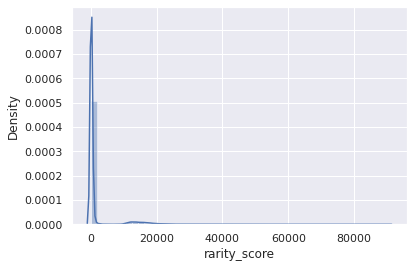

In [474]:
sns.distplot(Intcolumn["rarity_score"])

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rarity_score'>

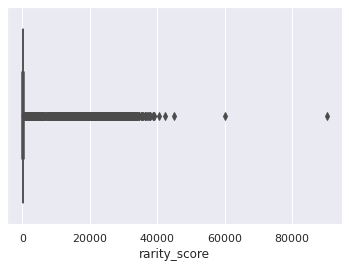

In [475]:
sns.boxplot(Intcolumn["rarity_score"])

In [476]:
i="rarity_score"
ll25=Intcolumn[i].quantile(0.25)
ul75=Intcolumn[i].quantile(0.75)
iqr=ul75-ll25
ul=ul75+(1.5*iqr)
ll=ll25-(1.5*iqr)
Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))

<ipython-input-476-49dc071d4de2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intcolumn[i]=np.where(Intcolumn[i]>=ul,ul,np.where(Intcolumn[i]<=ll,ll,Intcolumn[i]))


In [528]:
Intcolumn.corr()["last_sale_price"]

collection_id         -0.118710
total_supply          -0.081918
n_of_traits           -0.116099
seller_fees           -0.217513
platform_fees               NaN
openrarity_enabled    -0.018842
has_website                 NaN
has_own_twitter             NaN
has_discord            0.108122
has_medium            -0.033832
n_tweets_in_range     -0.024425
avg_likes             -0.008764
avg_replies           -0.016777
avg_retweets           0.268235
min_likes             -0.028513
min_replies                 NaN
min_retweets           0.272881
max_likes              0.003155
max_replies           -0.010179
max_retweets           0.301881
global_index          -0.096667
nft_id                -0.054077
rarity_score          -0.053918
openrarity_score       0.004893
openrarity_rank       -0.017176
openrarity_max_rank   -0.024517
last_sale_price        1.000000
Name: last_sale_price, dtype: float64

In [ ]:
[rarity_score,min_replies]

In [488]:
Intcolumn["openrarity_score"].describe()

count    309910.000000
mean          0.983927
std           0.078458
min           0.626738
25%           0.978289
50%           0.978289
75%           0.978289
max           3.663833
Name: openrarity_score, dtype: float64

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='openrarity_score', ylabel='Density'>

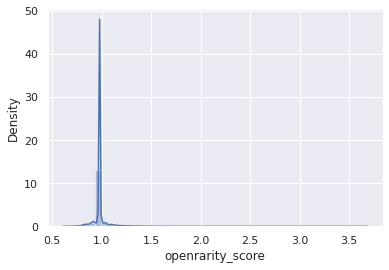

In [489]:
sns.distplot(Intcolumn["openrarity_score"])

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='openrarity_score'>

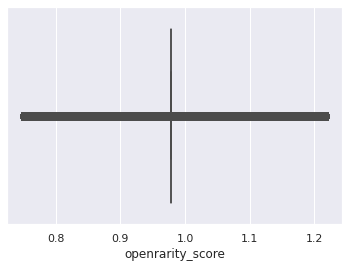

In [507]:
sns.boxplot(Intcolumn["openrarity_score"])

In [505]:
hCore=(Intcolumn["openrarity_score"].mean())+(3*Intcolumn["openrarity_score"].std())
lCore=(Intcolumn["openrarity_score"].mean())-(3*Intcolumn["openrarity_score"].std())

In [506]:
Intcolumn["openrarity_score"]=np.where(Intcolumn["openrarity_score"]>=hCore,
         hCore,
         np.where(Intcolumn["openrarity_score"]<=lCore,
         lCore,
         Intcolumn["openrarity_score"]))

<ipython-input-506-dd0a855bdca8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intcolumn["openrarity_score"]=np.where(Intcolumn["openrarity_score"]>=hCore,


In [514]:
Intcolumn["openrarity_rank"].describe()

count    309910.000000
mean       5630.164737
std        1942.636517
min           1.000000
25%        5630.164737
50%        5630.164737
75%        5630.164737
max       15555.000000
Name: openrarity_rank, dtype: float64

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='openrarity_rank'>

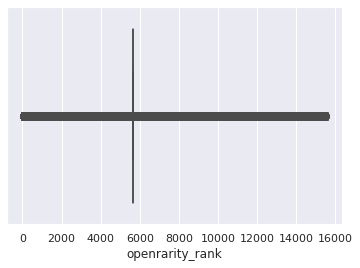

In [515]:
sns.boxplot(Intcolumn["openrarity_rank"])

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='openrarity_rank', ylabel='Density'>

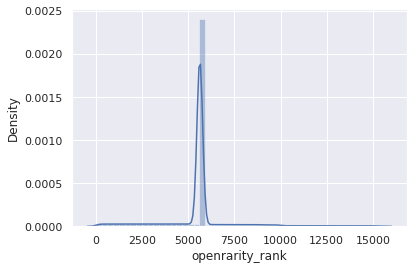

In [516]:
sns.distplot(Intcolumn["openrarity_rank"])

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='openrarity_rank', ylabel='Density'>

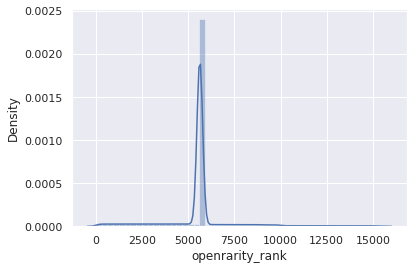

In [517]:
sns.distplot(train_data["openrarity_rank"])

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='openrarity_rank'>

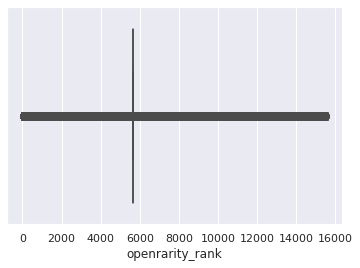

In [520]:
sns.boxplot(train_data["openrarity_rank"])

In [519]:
hCore=(Intcolumn["openrarity_rank"].mean())+(3*Intcolumn["openrarity_rank"].std())
lCore=(Intcolumn["openrarity_rank"].mean())-(3*Intcolumn["openrarity_rank"].std())
Intcolumn["openrarity_rank"]=np.where(Intcolumn["openrarity_rank"]>=hCore,
         hCore,
         np.where(Intcolumn["openrarity_rank"]<=lCore,
         lCore,
         Intcolumn["openrarity_rank"]))

<ipython-input-519-29aa53615e2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intcolumn["openrarity_rank"]=np.where(Intcolumn["openrarity_rank"]>=hCore,


In [529]:
train_with_collection["verification_status"].describe()

count       309910
unique           2
top       verified
freq        179370
Name: verification_status, dtype: object

In [531]:
train_with_collection["contract_type"].value_counts()

own        169702
default    140208
Name: contract_type, dtype: int64

In [539]:
train_with_collection[train_with_collection["contract_type"]=="own"]["verification_status"].value_counts()

verified    159703
approved      9999
Name: verification_status, dtype: int64

In [547]:
train=train_data.copy()

In [548]:
train

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price
0,21928,0,49,2.000000,NaN,NaN,NaN,2022-11,1.266732
1,32621,0,45,97.077216,NaN,NaN,NaN,2021-08,1.200357
2,32622,1,45,139.453086,NaN,NaN,NaN,2022-08,3.180572
3,32623,2,45,127.753445,NaN,NaN,NaN,2021-08,3.502910
4,32624,3,45,112.315719,NaN,NaN,NaN,2022-09,4.009567
...,...,...,...,...,...,...,...,...,...
309905,590223,8995,4,128.268841,NaN,NaN,NaN,2022-08,0.001571
309906,590224,8996,4,152.040769,NaN,NaN,NaN,2022-08,0.001661
309907,590225,8997,4,178.734807,NaN,NaN,NaN,2022-08,0.008480
309908,590226,8998,4,130.974464,NaN,NaN,NaN,2022-08,0.004236


In [549]:
train["openrarity_rank"].describe()

count    80480.000000
mean      5630.164737
std       3812.126968
min          1.000000
25%       2515.750000
50%       5030.000000
75%       8207.250000
max      15555.000000
Name: openrarity_rank, dtype: float64

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='openrarity_score', ylabel='Density'>

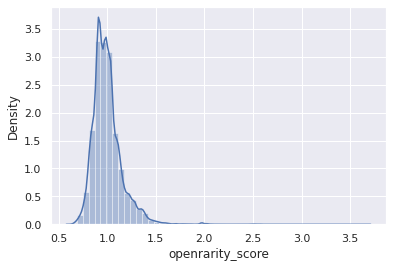

In [553]:
sns.distplot(train["openrarity_score"])

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='openrarity_score'>

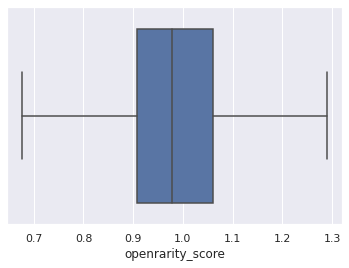

In [570]:
sns.boxplot(train["openrarity_score"])

In [563]:
train["openrarity_score"].describe()

count    80480.000000
mean         0.997456
std          0.139116
min          0.626738
25%          0.906820
50%          0.978289
75%          1.059866
max          1.458475
Name: openrarity_score, dtype: float64

In [571]:
train.corr()["last_sale_price"]

global_index          -0.096667
nft_id                -0.055394
collection_id         -0.118710
rarity_score          -0.046505
openrarity_score       0.039849
openrarity_rank       -0.076041
openrarity_max_rank   -0.098312
last_sale_price        1.000000
Name: last_sale_price, dtype: float64

In [556]:
hCore=(train["openrarity_score"].mean())+(3*train["openrarity_score"].std())
lCore=(train["openrarity_score"].mean())-(3*train["openrarity_score"].std())

In [557]:
hCore

1.4584748104984346

In [558]:
lCore

0.5415251895015585

In [562]:
train["openrarity_score"]=np.where(train["openrarity_score"]>hCore,
         hCore,
         np.where(train["openrarity_score"]<lCore,
         lCore,
         train["openrarity_score"]))

In [569]:
i="openrarity_score"
ll25=train[i].quantile(0.25)
ul75=train[i].quantile(0.75)
iqr=ul75-ll25
ul=ul75+(1.5*iqr)
ll=ll25-(1.5*iqr)
train[i]=np.where(train[i]>=ul,ul,np.where(train[i]<=ll,ll,train[i]))

In [567]:
ul

1.289434158628891

In [568]:
ll

0.6772522636034031

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='openrarity_rank', ylabel='Density'>

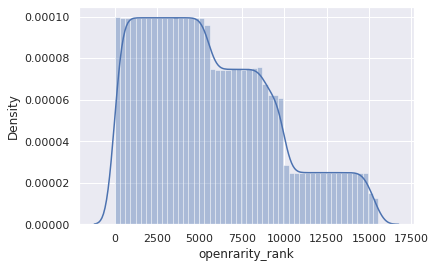

In [572]:
sns.distplot(train["openrarity_rank"])

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='openrarity_max_rank'>

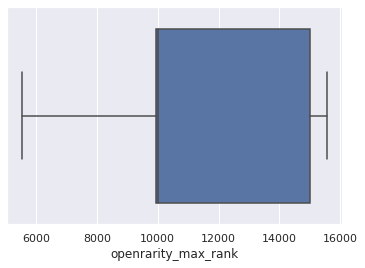

In [574]:
sns.boxplot(train["openrarity_max_rank"])

In [705]:
train_data.corr()["last_sale_price"]

global_index          -0.096667
nft_id                -0.055394
collection_id         -0.118710
rarity_score          -0.046505
openrarity_score      -0.013778
openrarity_rank       -0.026534
openrarity_max_rank   -0.025981
last_sale_price        1.000000
Name: last_sale_price, dtype: float64

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='global_index', ylabel='Density'>

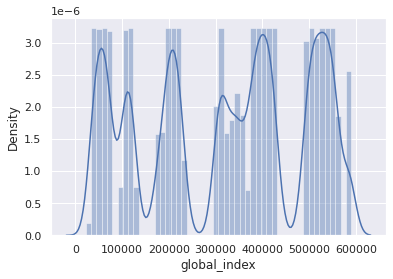

In [706]:
sns.distplot(train_data["global_index"])

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='global_index'>

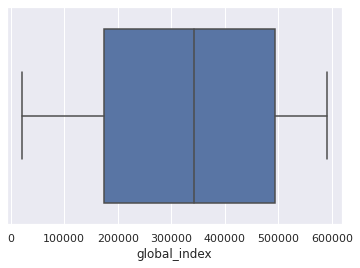

In [707]:
sns.boxplot(train_data["global_index"])

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nft_id'>

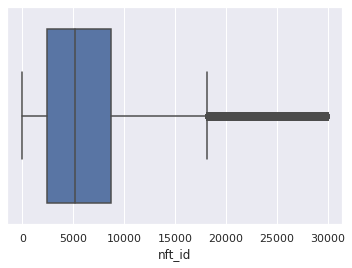

In [708]:
sns.boxplot(train_data["nft_id"])

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nft_id', ylabel='Density'>

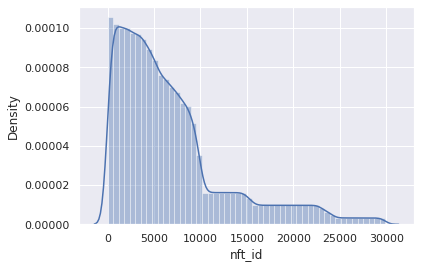

In [709]:
sns.distplot(train_data["nft_id"])

In [710]:
train_data["nft_id"].describe()

count    309910.000000
mean       6738.162024
std        5977.542096
min           0.000000
25%        2453.000000
50%        5138.000000
75%        8720.750000
max       29898.000000
Name: nft_id, dtype: float64

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rarity_score', ylabel='Density'>

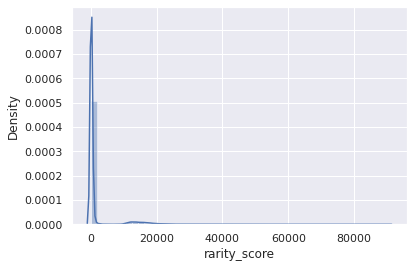

In [711]:
sns.distplot(train_data["rarity_score"])

/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='openrarity_score'>

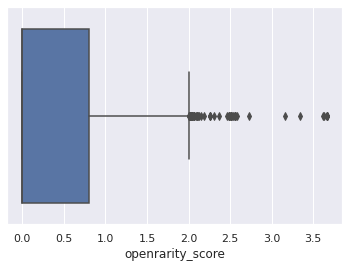

In [713]:
sns.boxplot(train_data["openrarity_score"])

In [730]:
data1=train_data[train_data["openrarity_score"].values<=0.0]
data2=train_data[train_data["openrarity_score"].values>0.0]
data1.corr()["last_sale_price"]
# data2.corr()["last_sale_price"]

global_index          -0.193324
nft_id                -0.058619
collection_id         -0.153186
rarity_score          -0.052191
openrarity_score            NaN
openrarity_rank             NaN
openrarity_max_rank         NaN
last_sale_price        1.000000
Name: last_sale_price, dtype: float64

In [715]:
i="openrarity_score"
ll25=train_data[i].quantile(0.25)
ul75=train_data[i].quantile(0.75)
iqr=ul75-ll25
ul=ul75+(1.5*iqr)
ll=ll25-(1.5*iqr)
# train_data[i]=np.where(train_data[i]>=ul,ul,np.where(train_data[i]<=ll,ll,train_data[i]))

In [716]:
ul

2.0036502307656474

In [727]:
train_data.corr()["last_sale_price"]

global_index          -0.096667
nft_id                -0.055394
collection_id         -0.118710
rarity_score          -0.046505
openrarity_score      -0.013778
openrarity_rank       -0.026534
openrarity_max_rank   -0.025981
last_sale_price        1.000000
Name: last_sale_price, dtype: float64

In [745]:
train=data2.drop(["last_sale_date","last_sale_price"],axis=1)
test=data2["last_sale_price"]                 

In [746]:
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2)

In [747]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [748]:
print(reg.score(x_train,y_train))

0.25899550310351416


In [749]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
print(reg.score(x_train,y_train))

0.25899550310351416


/home/administrator/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='openrarity_score', ylabel='Density'>

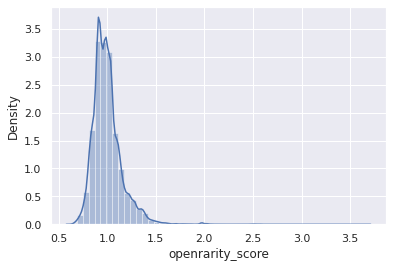

In [739]:
sns.distplot(data2["openrarity_score"])

In [740]:
dt=data1.drop(["last_sale_price","last_sale_date"],axis=1)
dt1=data1["last_sale_price"]

In [741]:
x_train,x_test,y_train,y_test=train_test_split(dt,dt1,test_size=0.3)

In [742]:
reg.fit(x_train,y_train)

LinearRegression()

In [743]:
print(reg.score(x_train,y_train))

0.05111908680586663


In [744]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
print(reg.score(x_train,y_train))

0.05111908680586663


In [750]:
train_with_collection

,collection_id,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,...,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price
0,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322076,0,48.156807,0.0,0.0,0.0,2022-11,12.508229
1,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322077,1,82.404768,0.0,0.0,0.0,2022-11,0.000800
2,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322078,2,30.983457,0.0,0.0,0.0,2022-11,0.002823
3,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322079,3,62.799472,0.0,0.0,0.0,2021-11,85.009723
4,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322080,4,45.523411,0.0,0.0,0.0,2021-11,0.009392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309905,0,6501,2022-04,verified,31,own,500.0,250,False,False,...,14,76,63025,6496,701.371138,0.0,0.0,0.0,2022-08,0.000362
309906,0,6501,2022-04,verified,31,own,500.0,250,False,False,...,14,76,63026,6497,346.851413,0.0,0.0,0.0,2022-08,0.002101
309907,0,6501,2022-04,verified,31,own,500.0,250,False,False,...,14,76,63027,6498,302.000756,0.0,0.0,0.0,2022-08,0.005883
309908,0,6501,2022-04,verified,31,own,500.0,250,False,False,...,14,76,63028,6499,276.210173,0.0,0.0,0.0,2022-08,0.009228
